# Working with Description

## Combine Description with Board Game Dataset

In this notebook, we're going to process description data and integrate it into our board game dataset. 

Our approach follows the procedures outlined in Week 1 exercise.

To begin, we convert all text to lowercase, and then eliminate punctuation and stop words. Finally, we apply stemming to reduce the remaining words to their base forms.

In [9]:
import pandas as pd
import numpy as np

# Merge board-game.csv with description.csv
df_description = pd.read_csv("data/description.csv")
df = pd.read_csv("data/board-game.csv")
df = pd.concat([df, df_description], axis=1)
df.head(10)

,Name,Year,min_players,max_players,min_playtime,max_playtime,min_age,category,mechanic,userrated,avg_rate,rank,owned,trading,wanting,wishing,num_comments,num_weights,avg_weight,Description
0,Brian Boru: High King of Ireland,2021,3,5,60,90,14,"['Card Game', 'Medieval', 'Territory Building']","['Area Majority / Influence', 'Closed Drafting...",3003,7.55005,774,4200,76,359,1561,522,93,2.4516,"In Brian Boru: High King of Ireland, you striv..."
1,Jump Drive,2017,2,4,10,30,13,"['Card Game', 'Science Fiction', 'Space Explor...","['Hand Management', 'Simultaneous Action Selec...",4510,6.99382,1123,6348,229,215,1233,1097,106,2.0189,"With the invention of Jump Drive, the race for..."
2,DVONN,2001,2,2,30,30,9,['Abstract Strategy'],"['Grid Movement', 'Map Reduction']",4960,7.45702,591,6917,130,291,1318,1481,386,2.6632,DVONN is played on an elongated hexagonal boar...
3,Point Salad,2019,2,6,15,30,8,['Card Game'],"['Open Drafting', 'Set Collection']",17480,7.17658,462,29303,300,304,2505,2431,353,1.1530,Point Salad is a fast and fun card drafting ga...
4,Linko,2014,2,5,20,20,10,['Card Game'],"['Hand Management', 'Move Through Deck', 'Open...",4926,6.99363,1072,7998,167,116,662,1020,240,1.3917,"In Linko! (a.k.a. Abluxxen), you take turns pl..."
5,Irish Gauge,2014,3,5,60,60,12,"['Economic', 'Trains']","['Auction/Bidding', 'Hexagon Grid', 'Income', ...",3162,7.25133,1018,4984,108,235,1092,679,77,2.3506,Irish Gauge &mdash; one of three titles in Win...
6,Balloon Cup,2003,2,2,30,30,8,"['Aviation / Flight', 'Card Game']","['Hand Management', 'Set Collection', 'Take Th...",6004,6.67301,1453,6329,144,329,988,2085,654,1.4587,"In Balloon Cup, the players compete in several..."
7,Call of Cthulhu: The Card Game,2008,2,2,30,30,13,"['Card Game', 'Collectible Components', 'Fanta...","['Deck, Bag, and Pool Building', 'Hand Managem...",3016,6.89349,1648,5400,283,107,546,794,218,2.8945,&quot;The oldest and strongest emotion of mank...
8,Schotten Totten,1999,2,2,20,20,8,['Card Game'],"['Card Play Conflict Resolution', 'Hand Manage...",10788,7.35095,400,18275,208,274,1996,1995,450,1.7044,"In Schotten Totten, nine boundary stones lie b..."
9,Navegador,2010,2,5,60,90,12,"['Economic', 'Exploration', 'Nautical', 'Renai...","['Advantage Token', 'Area Movement', 'Market',...",9056,7.53886,289,8887,180,602,2116,1805,573,3.0855,This game is inspired by the Portuguese Age of...


In [10]:
# Unescaping & Downcasing
import html

df['Description'] = df['Description'].apply(lambda x: html.unescape(x)).str.lower()

In [11]:
# Remove punctuation
import re
import string

regex = re.compile('[%s]' % re.escape(string.punctuation))
df['Description'] = df['Description'].apply(lambda x: regex.sub('', x))

In [14]:
# Remove stop-words
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

df['Description'] = df['Description'].apply(remove_stopwords)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\byx10\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [16]:
# Stemming
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")
df['Description'] = df['Description'].apply(lambda x: " ".join(stemmer.stem(w) for w in x.split()))

In [20]:
df.to_csv("data/board-game-with-desc.csv", index=False)

## Find the Relation between Desc and Score

In [9]:
import pandas as pd
import numpy as np

# Merge board-game.csv with description.csv
df = pd.read_csv("data/board-game-with-desc.csv")
high_score = pd.read_csv("data/high_score.csv")
high_score.drop("Unnamed: 0", axis=1,inplace=True)
low_score = pd.read_csv("data/low_score.csv")
low_score.drop("Unnamed: 0", axis=1,inplace=True)
df.head(10)

,Name,Year,min_players,max_players,min_playtime,max_playtime,min_age,category,mechanic,userrated,avg_rate,rank,owned,trading,wanting,wishing,num_comments,num_weights,avg_weight,Description
0,Brian Boru: High King of Ireland,2021,3,5,60,90,14,"['Card Game', 'Medieval', 'Territory Building']","['Area Majority / Influence', 'Closed Drafting...",3003,7.55005,774,4200,76,359,1561,522,93,2.4516,brian boru high king ireland strive unit irela...
1,Jump Drive,2017,2,4,10,30,13,"['Card Game', 'Science Fiction', 'Space Explor...","['Hand Management', 'Simultaneous Action Selec...",4510,6.99382,1123,6348,229,215,1233,1097,106,2.0189,invent jump drive race galaxi begin develop ne...
2,DVONN,2001,2,2,30,30,9,['Abstract Strategy'],"['Grid Movement', 'Map Reduction']",4960,7.45702,591,6917,130,291,1318,1481,386,2.6632,dvonn play elong hexagon board 23 white 23 bla...
3,Point Salad,2019,2,6,15,30,8,['Card Game'],"['Open Drafting', 'Set Collection']",17480,7.17658,462,29303,300,304,2505,2431,353,1.1530,point salad fast fun card draft game whole fam...
4,Linko,2014,2,5,20,20,10,['Card Game'],"['Hand Management', 'Move Through Deck', 'Open...",4926,6.99363,1072,7998,167,116,662,1020,240,1.3917,linko aka abluxxen take turn play number card ...
5,Irish Gauge,2014,3,5,60,60,12,"['Economic', 'Trains']","['Auction/Bidding', 'Hexagon Grid', 'Income', ...",3162,7.25133,1018,4984,108,235,1092,679,77,2.3506,irish gaug — one three titl winsom game 2014 e...
6,Balloon Cup,2003,2,2,30,30,8,"['Aviation / Flight', 'Card Game']","['Hand Management', 'Set Collection', 'Take Th...",6004,6.67301,1453,6329,144,329,988,2085,654,1.4587,balloon cup player compet sever short balloon ...
7,Call of Cthulhu: The Card Game,2008,2,2,30,30,13,"['Card Game', 'Collectible Components', 'Fanta...","['Deck, Bag, and Pool Building', 'Hand Managem...",3016,6.89349,1648,5400,283,107,546,794,218,2.8945,oldest strongest emot mankind fear oldest stro...
8,Schotten Totten,1999,2,2,20,20,8,['Card Game'],"['Card Play Conflict Resolution', 'Hand Manage...",10788,7.35095,400,18275,208,274,1996,1995,450,1.7044,schotten totten nine boundari stone lie oppon ...
9,Navegador,2010,2,5,60,90,12,"['Economic', 'Exploration', 'Nautical', 'Renai...","['Advantage Token', 'Area Movement', 'Market',...",9056,7.53886,289,8887,180,602,2116,1805,573,3.0855,game inspir portugues age discoveri 15th16th c...


In [10]:
desc = df["Description"]
type(desc)

pandas.core.series.Series

In [26]:
high_desc = pd.DataFrame(desc).join(high_score)
low_desc = pd.DataFrame(desc).join(low_score)
high_desc.head(10)

,Description,score
0,brian boru high king ireland strive unit irela...,59.347971
1,invent jump drive race galaxi begin develop ne...,38.289386
2,dvonn play elong hexagon board 23 white 23 bla...,53.014469
3,point salad fast fun card draft game whole fam...,41.117708
4,linko aka abluxxen take turn play number card ...,34.530331
5,irish gaug — one three titl winsom game 2014 e...,48.108449
6,balloon cup player compet sever short balloon ...,25.170634
7,oldest strongest emot mankind fear oldest stro...,35.990738
8,schotten totten nine boundari stone lie oppon ...,48.399926
9,game inspir portugues age discoveri 15th16th c...,58.491398


In [27]:
high_desc = high_desc[high_desc['score'] > 60]
high_desc.info()
high_desc = high_desc.Description
high_desc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 10 to 1996
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Description  575 non-null    object 
 1   score        575 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.5+ KB


In [28]:
low_desc = low_desc[low_desc['score'] > 30]
low_desc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 105 to 1940
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Description  40 non-null     object 
 1   score        40 non-null     float64
dtypes: float64(1), object(1)
memory usage: 960.0+ bytes


##### Since there are very few low-scoring items, we only analyze high-scoring items.

In [30]:
from operator import itemgetter as itget
def top_cnt(words):
    word_cnt = {}
    for word in words:
        if word in word_cnt:
            word_cnt[word] += 1
        else:
            word_cnt[word] = 1
    
    #return max(word_cnt, key=word_cnt.get)
    sorted_word_cnt = sorted(word_cnt.items(), key=itget(1), reverse=True)
    return sorted_word_cnt[:50]

words = []
for i in high_desc:
    wds = i.split()
    words.extend(wds)

top50 = top_cnt(words)
print("Top 50 neg words:")
for word, frequency in top50:
    print(f"{word}: {frequency}")

Top 50 neg words:
game: 1980
player: 1847
card: 952
new: 688
one: 618
play: 612
action: 515
use: 464
take: 439
build: 425
board: 392
power: 362
turn: 359
time: 348
’: 341
point: 331
also: 321
end: 292
two: 280
set: 275
world: 272
war: 272
round: 272
must: 269
differ: 268
place: 246
battl: 238
make: 237
system: 235
includ: 233
resourc: 233
citi: 233
victori: 232
control: 226
hero: 223
rule: 222
dice: 216
uniqu: 214
publish: 209
win: 206
tile: 200
three: 190
need: 187
map: 187
order: 185
start: 183
get: 182
—: 180
develop: 176
deck: 171


In [33]:
high_desc

10      new villain appear lay claim world indin new h...
13      command world best special forc oper complet v...
15      regard mani reiner knizia masterpiec tigri eup...
16      core space scienc fiction miniatur board game ...
19      america 19th centuri rancher repeat herd cattl...
                              ...                        
1975    brass lancashir — first publish brass — econom...
1987    hush intimaci laboratori emin research beatrix...
1991    human set star search highpow fuel found remot...
1993    tactic karma wealth fame 16th centuri india po...
1996    generat rat old junkyard tell great legend moo...
Name: Description, Length: 575, dtype: object

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer as tfid

vectorizer = tfid(max_features=10000)
tfidf_matrix = vectorizer.fit_transform(high_desc)

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df.head(10)

,000,001wenora,002grakki,02,0600,07,09,10,100,1000,...,zombielik,zon,zone,zoom,zu,águila,çœ,époqu,ðµð³ðµð½ð,ðºð¾ð³ð¾
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076676,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
mean_tfidf_scores = tfidf_df.mean(axis=0)
sorted_mean_tfidf_scores = mean_tfidf_scores.sort_values(ascending=False)

top50 = sorted_mean_tfidf_scores.head(50)
print(top50)

game        0.055197
player      0.054222
card        0.040089
new         0.029896
action      0.024929
play        0.024689
one         0.024212
build       0.021756
hero        0.019836
use         0.019739
board       0.019196
take        0.019022
power       0.018939
point       0.017425
world       0.016733
time        0.016583
citi        0.016538
war         0.016276
turn        0.016247
round       0.016194
battl       0.015271
end         0.015148
dice        0.015089
set         0.014961
system      0.014401
also        0.014398
resourc     0.014288
control     0.014204
uniqu       0.014203
must        0.014160
two         0.014071
differ      0.014003
tile        0.013387
publish     0.013378
victori     0.013361
place       0.013176
make        0.013046
descript    0.012923
adventur    0.012873
rule        0.012802
includ      0.012770
ship        0.012557
three       0.012322
deck        0.012300
explor      0.012001
win         0.011820
featur      0.011743
base        0

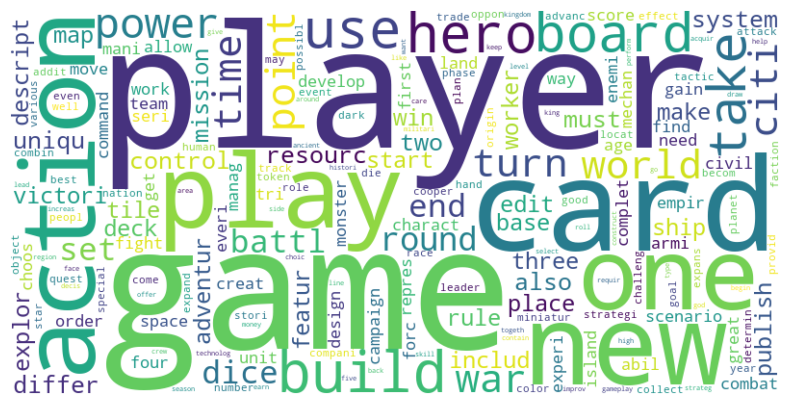

In [37]:
# Use this cell for your code
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 将 TF-IDF DataFrame 转换成字典，其中键是词语，值是对应的 TF-IDF 分数
tfidf_dict = tfidf_df.sum().to_dict()

# 创建 WordCloud 对象并生成词云
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_dict)

# 显示词云
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Category-Mechanic-Score(Weight)

In [43]:
import pandas as pd
import numpy as np

# Merge board-game.csv with description.csv
df = pd.read_csv("data/board-game-with-desc.csv")
high_score = pd.read_csv("data/high_score.csv")
high_score.drop("Unnamed: 0", axis=1,inplace=True)
low_score = pd.read_csv("data/low_score.csv")
low_score.drop("Unnamed: 0", axis=1,inplace=True)
df.head(10)

,Name,Year,min_players,max_players,min_playtime,max_playtime,min_age,category,mechanic,userrated,avg_rate,rank,owned,trading,wanting,wishing,num_comments,num_weights,avg_weight,Description
0,Brian Boru: High King of Ireland,2021,3,5,60,90,14,"['Card Game', 'Medieval', 'Territory Building']","['Area Majority / Influence', 'Closed Drafting...",3003,7.55005,774,4200,76,359,1561,522,93,2.4516,brian boru high king ireland strive unit irela...
1,Jump Drive,2017,2,4,10,30,13,"['Card Game', 'Science Fiction', 'Space Explor...","['Hand Management', 'Simultaneous Action Selec...",4510,6.99382,1123,6348,229,215,1233,1097,106,2.0189,invent jump drive race galaxi begin develop ne...
2,DVONN,2001,2,2,30,30,9,['Abstract Strategy'],"['Grid Movement', 'Map Reduction']",4960,7.45702,591,6917,130,291,1318,1481,386,2.6632,dvonn play elong hexagon board 23 white 23 bla...
3,Point Salad,2019,2,6,15,30,8,['Card Game'],"['Open Drafting', 'Set Collection']",17480,7.17658,462,29303,300,304,2505,2431,353,1.1530,point salad fast fun card draft game whole fam...
4,Linko,2014,2,5,20,20,10,['Card Game'],"['Hand Management', 'Move Through Deck', 'Open...",4926,6.99363,1072,7998,167,116,662,1020,240,1.3917,linko aka abluxxen take turn play number card ...
5,Irish Gauge,2014,3,5,60,60,12,"['Economic', 'Trains']","['Auction/Bidding', 'Hexagon Grid', 'Income', ...",3162,7.25133,1018,4984,108,235,1092,679,77,2.3506,irish gaug — one three titl winsom game 2014 e...
6,Balloon Cup,2003,2,2,30,30,8,"['Aviation / Flight', 'Card Game']","['Hand Management', 'Set Collection', 'Take Th...",6004,6.67301,1453,6329,144,329,988,2085,654,1.4587,balloon cup player compet sever short balloon ...
7,Call of Cthulhu: The Card Game,2008,2,2,30,30,13,"['Card Game', 'Collectible Components', 'Fanta...","['Deck, Bag, and Pool Building', 'Hand Managem...",3016,6.89349,1648,5400,283,107,546,794,218,2.8945,oldest strongest emot mankind fear oldest stro...
8,Schotten Totten,1999,2,2,20,20,8,['Card Game'],"['Card Play Conflict Resolution', 'Hand Manage...",10788,7.35095,400,18275,208,274,1996,1995,450,1.7044,schotten totten nine boundari stone lie oppon ...
9,Navegador,2010,2,5,60,90,12,"['Economic', 'Exploration', 'Nautical', 'Renai...","['Advantage Token', 'Area Movement', 'Market',...",9056,7.53886,289,8887,180,602,2116,1805,573,3.0855,game inspir portugues age discoveri 15th16th c...


In [2]:
cat_wei = df[["category", "avg_weight"]]
mec_wei = df[["mechanic", "avg_weight"]]
cat_wei['category'] = cat_wei['category'].apply(eval)
mec_wei['mechanic'] = mec_wei['mechanic'].apply(eval)
type(cat_wei.iloc[0]['category'])
cat_wei.iloc[0]['category']
mec_wei.iloc[0]

C:\Users\fsd_n\AppData\Local\Temp\ipykernel_12660\2999850988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_wei['category'] = cat_wei['category'].apply(eval)
C:\Users\fsd_n\AppData\Local\Temp\ipykernel_12660\2999850988.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mec_wei['mechanic'] = mec_wei['mechanic'].apply(eval)


mechanic      [Area Majority / Influence, Closed Drafting, H...
avg_weight                                               2.4516
Name: 0, dtype: object

In [3]:
tmp = cat_wei.explode('category')
category_weight_avg = tmp.groupby('category')['avg_weight'].mean().reset_index().sort_values(by='avg_weight',ascending=False)

# 打印每个category的平均weight值
print(category_weight_avg)
#category_weight_avg

"""corr = category_weight_avg.pivot_table(index='category', columns='avg_weight',aggfunc='size', fill_value=0).corr()
corr"""

                    category  avg_weight
36                Korean War    4.240700
77               Vietnam War    4.181700
56             Pike and Shot    3.785592
58                 Political    3.328357
35  Industry / Manufacturing    3.295606
..                       ...         ...
79                 Word Game    1.396461
55                Party Game    1.378049
1         Action / Dexterity    1.333140
15           Children's Game    1.310354
75                    Trivia    1.150282

[83 rows x 2 columns]


"corr = category_weight_avg.pivot_table(index='category', columns='avg_weight',aggfunc='size', fill_value=0).corr()\ncorr"

In [4]:
tmp = mec_wei.explode('mechanic')
mechanic_weight_avg = tmp.groupby('mechanic')['avg_weight'].mean().reset_index().sort_values(by='avg_weight',ascending=False)

# 打印每个category的平均weight值
print(mechanic_weight_avg)
#category_weight_avg

                       mechanic  avg_weight
11                 Area-Impulse    3.729800
43   Critical Hits and Failures    3.685407
112         Passed Action Token    3.649000
99        Moving Multiple Units    3.525550
8                     Alliances    3.447313
..                          ...         ...
152              Speed Matching    1.212850
149           Single Loser Game    1.187875
120                Player Judge    1.103100
148                     Singing    1.083300
52                      Drawing    1.069400

[189 rows x 2 columns]


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

In [6]:
mlb = MultiLabelBinarizer()
category_features = mlb.fit_transform(df['category'])

X = pd.DataFrame(category_features, columns=mlb.classes_)
y = df['avg_weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

coefficients = pd.Series(model.coef_, index=X.columns)
print("coefficients:")
print(coefficients)


coefficients:
     5.108730e-02
"   -6.592055e-01
&   -1.782671e-01
'    2.632181e-01
,   -8.118730e-02
-    4.721719e-02
/   -2.938135e-01
A   -6.632671e-02
B   -1.378784e-01
C    9.265607e-02
D   -3.730621e-01
E    3.222360e-01
F    2.786457e-01
G   -5.834694e-01
H   -1.674370e-02
I    1.994937e-01
K    1.066668e+00
M    7.807700e-02
N    9.383015e-02
P   -6.631915e-02
R   -1.811143e-01
S   -1.850287e-01
T   -2.252663e-02
V    9.659445e-02
W    3.411373e-01
Z    3.435683e-01
[    9.436896e-16
]    1.110223e-16
a   -3.520433e-02
b   -1.650833e-01
c    2.907553e-01
d    2.670869e-01
e   -5.723550e-02
f    2.628709e-01
g    1.160879e-01
h    4.978107e-02
i   -4.948724e-02
k    3.913725e-01
l    1.256778e-02
m   -2.976328e-02
n   -3.739730e-02
o    1.480666e-01
p    1.081828e-01
r   -1.511932e-01
s    1.584139e-01
t    6.411765e-02
u   -1.614040e-01
v    1.841212e-02
x   -1.191850e-01
y   -8.049214e-02
z    1.722845e-01
dtype: float64


In [1]:
import pandas as pd
import numpy as np

# Merge board-game.csv with description.csv
df = pd.read_csv("data/board-game-with-desc.csv")
df.head(10)

,Name,Year,min_players,max_players,min_playtime,max_playtime,min_age,category,mechanic,userrated,avg_rate,rank,owned,trading,wanting,wishing,num_comments,num_weights,avg_weight,Description
0,Brian Boru: High King of Ireland,2021,3,5,60,90,14,"['Card Game', 'Medieval', 'Territory Building']","['Area Majority / Influence', 'Closed Drafting...",3003,7.55005,774,4200,76,359,1561,522,93,2.4516,brian boru high king ireland strive unit irela...
1,Jump Drive,2017,2,4,10,30,13,"['Card Game', 'Science Fiction', 'Space Explor...","['Hand Management', 'Simultaneous Action Selec...",4510,6.99382,1123,6348,229,215,1233,1097,106,2.0189,invent jump drive race galaxi begin develop ne...
2,DVONN,2001,2,2,30,30,9,['Abstract Strategy'],"['Grid Movement', 'Map Reduction']",4960,7.45702,591,6917,130,291,1318,1481,386,2.6632,dvonn play elong hexagon board 23 white 23 bla...
3,Point Salad,2019,2,6,15,30,8,['Card Game'],"['Open Drafting', 'Set Collection']",17480,7.17658,462,29303,300,304,2505,2431,353,1.1530,point salad fast fun card draft game whole fam...
4,Linko,2014,2,5,20,20,10,['Card Game'],"['Hand Management', 'Move Through Deck', 'Open...",4926,6.99363,1072,7998,167,116,662,1020,240,1.3917,linko aka abluxxen take turn play number card ...
5,Irish Gauge,2014,3,5,60,60,12,"['Economic', 'Trains']","['Auction/Bidding', 'Hexagon Grid', 'Income', ...",3162,7.25133,1018,4984,108,235,1092,679,77,2.3506,irish gaug — one three titl winsom game 2014 e...
6,Balloon Cup,2003,2,2,30,30,8,"['Aviation / Flight', 'Card Game']","['Hand Management', 'Set Collection', 'Take Th...",6004,6.67301,1453,6329,144,329,988,2085,654,1.4587,balloon cup player compet sever short balloon ...
7,Call of Cthulhu: The Card Game,2008,2,2,30,30,13,"['Card Game', 'Collectible Components', 'Fanta...","['Deck, Bag, and Pool Building', 'Hand Managem...",3016,6.89349,1648,5400,283,107,546,794,218,2.8945,oldest strongest emot mankind fear oldest stro...
8,Schotten Totten,1999,2,2,20,20,8,['Card Game'],"['Card Play Conflict Resolution', 'Hand Manage...",10788,7.35095,400,18275,208,274,1996,1995,450,1.7044,schotten totten nine boundari stone lie oppon ...
9,Navegador,2010,2,5,60,90,12,"['Economic', 'Exploration', 'Nautical', 'Renai...","['Advantage Token', 'Area Movement', 'Market',...",9056,7.53886,289,8887,180,602,2116,1805,573,3.0855,game inspir portugues age discoveri 15th16th c...


In [11]:
df1 = df[["Year","category","avg_rate"]]
df2 = df[["Year","mechanic","avg_rate"]]
df1.info()
df2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      2000 non-null   int64  
 1   category  2000 non-null   object 
 2   avg_rate  2000 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 47.0+ KB


,Year,mechanic,avg_rate
0,2021,"['Area Majority / Influence', 'Closed Drafting...",7.55005
1,2017,"['Hand Management', 'Simultaneous Action Selec...",6.99382
2,2001,"['Grid Movement', 'Map Reduction']",7.45702
3,2019,"['Open Drafting', 'Set Collection']",7.17658
4,2014,"['Hand Management', 'Move Through Deck', 'Open...",6.99363
...,...,...,...
1995,2015,"['End Game Bonuses', 'Income', 'Open Drafting'...",7.18274
1996,2022,"['Point to Point Movement', 'Set Collection', ...",7.64693
1997,2020,"['Area Majority / Influence', 'Area Movement',...",7.34986
1998,2007,"['Auction/Bidding', 'Auction: Sealed Bid', 'Co...",7.15592


In [14]:
df1['category'] = df1['category'].apply(eval)
df2['mechanic'] = df2['mechanic'].apply(eval)
df1 = df1.explode('category')
df2 = df2.explode('mechanic')
df2

C:\Users\fsd_n\AppData\Local\Temp\ipykernel_20388\225547765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['category'] = df1['category'].apply(eval)
C:\Users\fsd_n\AppData\Local\Temp\ipykernel_20388\225547765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['mechanic'] = df2['mechanic'].apply(eval)


,Year,mechanic,avg_rate
0,2021,Area Majority / Influence,7.55005
0,2021,Closed Drafting,7.55005
0,2021,Hand Management,7.55005
0,2021,Trick-taking,7.55005
1,2017,Hand Management,6.99382
...,...,...,...
1998,2007,Set Collection,7.15592
1999,2014,End Game Bonuses,7.18267
1999,2014,Rondel,7.18267
1999,2014,Tile Placement,7.18267


In [18]:
df1['Year']

0       2021
0       2021
0       2021
1       2017
1       2017
        ... 
1998    2007
1998    2007
1998    2007
1999    2014
1999    2014
Name: Year, Length: 6160, dtype: int64

In [20]:
cat_cnt = df1.groupby(['Year','category']).size().reset_index(name='count')
print(cat_cnt)
cat_cnt.info()

      Year            category  count
0    -2200   Abstract Strategy      1
1        0  Action / Dexterity      1
2        0               Humor      1
3        0          Party Game      1
4      762   Abstract Strategy      1
...    ...                 ...    ...
1540  2023         Renaissance      1
1541  2023     Science Fiction      2
1542  2023              Travel      2
1543  2023    Video Game Theme      2
1544  2023             Wargame      1

[1545 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      1545 non-null   int64 
 1   category  1545 non-null   object
 2   count     1545 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 36.3+ KB


In [38]:
max_cat = cat_cnt.groupby('Year')['count'].idxmax()
result = cat_cnt.loc[max_cat]
result = result.sort_values(by='Year', ascending=False)

pd.set_option('display.max_rows',100) 

print(result)

      Year            category  count
1523  2023            Economic      6
1478  2022             Fantasy     28
1406  2021           Card Game     33
1346  2020           Card Game     32
1286  2019           Card Game     48
1226  2018           Card Game     42
1158  2017           Card Game     48
1094  2016           Card Game     44
1027  2015           Card Game     44
962   2014           Card Game     35
901   2013           Card Game     24
838   2012           Card Game     26
780   2011           Card Game     26
727   2010            Economic     18
679   2009            Fighting     15
657   2008             Wargame      8
572   2007            Economic     11
531   2006            Economic      6
481   2005           Adventure      9
451   2004            Economic     12
409   2003   Abstract Strategy      4
390   2002            Economic      4
354   2001   Abstract Strategy      3
338   2000       City Building      6
309   1999         Exploration      4
282   1998  

In [40]:
N = 5  #
top_categories = cat_cnt.groupby('Year').apply(lambda x: x.nlargest(N, 'count')).reset_index(drop=True)
top_categories = top_categories.sort_values(by='Year',ascending=False)
pd.set_option('display.max_rows',50) 
print(top_categories)
type(top_categories)

     Year            category  count
271  2023                Dice      3
270  2023         Exploration      4
269  2023           Card Game      4
268  2023            Fighting      5
267  2023            Economic      6
..    ...                 ...    ...
4     762   Abstract Strategy      1
2       0               Humor      1
1       0  Action / Dexterity      1
3       0          Party Game      1
0   -2200   Abstract Strategy      1

[272 rows x 3 columns]


pandas.core.frame.DataFrame

In [36]:
year_to_check = 2021  #
categories_for_year = cat_cnt[cat_cnt['Year'] == year_to_check]
categories_for_year = categories_for_year.sort_values(by="count",ascending=False)

print(categories_for_year)


      Year         category  count
1418  2021          Fantasy     33
1406  2021        Card Game     33
1414  2021         Economic     16
1417  2021      Exploration     16
1402  2021          Animals     15
...    ...              ...    ...
1403  2021          Arabian      1
1415  2021      Educational      1
1439  2021  Post-Napoleonic      1
1438  2021        Political      1
1456  2021          Zombies      1

[61 rows x 3 columns]


In [41]:
mec_cnt = df2.groupby(['Year','mechanic']).size().reset_index(name='count')
print(mec_cnt)
mec_cnt.info()

      Year                                  mechanic  count
0    -2200                                 Enclosure      1
1    -2200                               Square Grid      1
2        0                                  Flicking      1
3        0                          Paper-and-Pencil      1
4        0                           Team-Based Game      1
...    ...                                       ...    ...
2878  2023                           Variable Set-up      4
2879  2023              Victory Points as a Resource      2
2880  2023                                    Voting      1
2881  2023                          Worker Placement      2
2882  2023  Worker Placement, Different Worker Types      3

[2883 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2883 entries, 0 to 2882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      2883 non-null   int64 
 1   mechanic  2883 non-null   obje

In [42]:
max_mec = mec_cnt.groupby('Year')['count'].idxmax()
result = mec_cnt.loc[max_mec]
result = result.sort_values(by='Year', ascending=False)

pd.set_option('display.max_rows',100) 

print(result)

      Year                   mechanic  count
2841  2023            Hand Management     10
2815  2022     Variable Player Powers     32
2679  2021      Solo / Solitaire Game     50
2502  2020            Hand Management     47
2448  2019     Variable Player Powers     59
2214  2018               Dice Rolling     49
2174  2017     Variable Player Powers     56
1962  2016            Hand Management     51
1835  2015            Hand Management     50
1716  2014            Hand Management     43
1606  2013            Hand Management     28
1494  2012            Hand Management     33
1375  2011            Hand Management     34
1270  2010            Hand Management     29
1170  2009               Dice Rolling     22
1091  2008            Hand Management     16
1010  2007            Hand Management     18
948   2006            Hand Management     15
849   2005               Dice Rolling     18
776   2004            Hand Management     17
702   2003  Area Majority / Influence      6
656   2002

In [43]:
N = 5  #
top_mechanics = mec_cnt.groupby('Year').apply(lambda x: x.nlargest(N, 'count')).reset_index(drop=True)
top_mechanics = top_mechanics.sort_values(by='Year',ascending=False)
pd.set_option('display.max_rows',50) 
print(top_mechanics)
type(top_mechanics)

     Year                      mechanic  count
306  2023                  Dice Rolling      4
305  2023        Variable Player Powers      7
304  2023         Solo / Solitaire Game      7
303  2023  Deck, Bag, and Pool Building      7
302  2023               Hand Management     10
..    ...                           ...    ...
4       0               Team-Based Game      1
2       0                      Flicking      1
3       0              Paper-and-Pencil      1
1   -2200                   Square Grid      1
0   -2200                     Enclosure      1

[307 rows x 3 columns]


pandas.core.frame.DataFrame

In [45]:
year_to_check = 2023  #
mechanics_for_year = mec_cnt[mec_cnt['Year'] == year_to_check]
mechanics_for_year = mechanics_for_year.sort_values(by="count",ascending=False)

print(mechanics_for_year)

      Year                      mechanic  count
2841  2023               Hand Management     10
2834  2023  Deck, Bag, and Pool Building      7
2877  2023        Variable Player Powers      7
2868  2023         Solo / Solitaire Game      7
2878  2023               Variable Set-up      4
...    ...                           ...    ...
2853  2023                     Ownership      1
2856  2023            Player Elimination      1
2835  2023                     Deduction      1
2859  2023                          Race      1
2822  2023               Action Drafting      1

[61 rows x 3 columns]


### Work with Price

In [7]:
p2e = 1.16
d2e = 0.95

import pandas as pd
import numpy as np

In [8]:
price = pd.read_csv("data/prices.csv")
price.head(10)

,Amazon,Noble Knight Games,Cardhaus Games,Miniature Market,Boardtopia,Zatu Games,All Systems Go Games,Stonemaier Games,BGG Store,Coupled Games,TLAMA games,Hachette Boardgames USA,Fowers Games,Keen Bean Studio,Allplay,Stellar Factory
0,$55.00,$49.95,$41.99,$43.99,$40.99,£28.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,$23.00,$21.95,$17.99,$17.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,$31.85,$29.95,$24.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,$19.99,$15.00,NaN,$15.99,$19.99,£20.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,$11.95,NaN,$9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,$70.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,$99.95,$70.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,$14.99,$12.00,NaN,NaN,NaN,£10.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,$129.99,$85.00,NaN,NaN,NaN,£28.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
price.info()
price.iloc[0]['Amazon']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Amazon                   1183 non-null   object
 1   Noble Knight Games       1612 non-null   object
 2   Cardhaus Games           529 non-null    object
 3   Miniature Market         684 non-null    object
 4   Boardtopia               169 non-null    object
 5   Zatu Games               702 non-null    object
 6   All Systems Go Games     120 non-null    object
 7   Stonemaier Games         12 non-null     object
 8   BGG Store                8 non-null      object
 9   Coupled Games            51 non-null     object
 10  TLAMA games              26 non-null     object
 11  Hachette Boardgames USA  13 non-null     object
 12  Fowers Games             5 non-null      object
 13  Keen Bean Studio         1 non-null      object
 14  Allplay                  6 non-null     

'$55.00'

In [10]:
def convert_to_eur(price):
    #print(price)
    if pd.isna(price):
        return None
    if price[0] == "$":
        return float(price[1:]) * d2e
    elif price[0] == "£":
        return float(price[1:]) * p2e
    else:
        return None
    
eur_pri = price.applymap(convert_to_eur)

# 保留最低价格列
eur_pri['lowest'] = eur_pri.min(axis=1)
eur_pri = eur_pri[['lowest']]
eur_pri

,lowest
0,33.0020
1,17.0905
2,23.7405
3,14.2500
4,9.4905
...,...
1995,35.6250
1996,28.4905
1997,45.5905
1998,NaN


In [11]:
eur_pri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lowest  1830 non-null   float64
dtypes: float64(1)
memory usage: 15.8 KB


In [13]:
score = pd.read_csv("data/high_score.csv")
score.drop("Unnamed: 0",inplace=True,axis=1)
score

,score
0,59.347971
1,38.289386
2,53.014469
3,41.117708
4,34.530331
...,...
1995,44.305477
1996,64.793856
1997,49.494620
1998,47.041357


In [16]:
pri = eur_pri.join(score)
pri.dropna(axis=0,how='any',inplace=True)
pri

,lowest,score
0,33.0020,59.347971
1,17.0905,38.289386
2,23.7405,53.014469
3,14.2500,41.117708
4,9.4905,34.530331
...,...,...
1994,66.5000,39.526542
1995,35.6250,44.305477
1996,28.4905,64.793856
1997,45.5905,49.494620


In [31]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

x = pri[['lowest']]
y = pri['score']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

model = LR()
model.fit(x_train, y_train)
print("coef:", model.coef_)
print("intercept:", model.intercept_)

# 在测试集上进行预测
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R-squared:", r2)

coef: [0.07687509]
intercept: 45.58462895886539
MSE: 321.8217089073374
R-squared: 0.03675313403940683


In [36]:
x = eur_pri
y = df['avg_weight']
print(type(x))
print(type(y))
tmp = x.join(y)
tmp.dropna(axis=0,how='any',inplace=True)
tmp

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


,lowest,avg_weight
0,33.0020,2.4516
1,17.0905,2.0189
2,23.7405,2.6632
3,14.2500,1.1530
4,9.4905,1.3917
...,...,...
1994,66.5000,2.2444
1995,35.6250,2.5037
1996,28.4905,2.2771
1997,45.5905,2.5938


In [42]:
x = tmp[['lowest']]
y =tmp[['avg_weight']]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

model = LR()
model.fit(x_train, y_train)
print("coef:", model.coef_)
print("intercept:", model.intercept_)

# 在测试集上进行预测
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R-squared:", r2)

coef: [[0.00506877]]
intercept: [2.2810593]
MSE: 0.5505372770972964
R-squared: 0.0931871702655056
